In [1]:
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from collections import defaultdict
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# fake-news data set
# ISOT dataset
true_news_df = pd.read_csv("/content/drive/MyDrive/Thesis/True.csv")
fake_news_df = pd.read_csv("/content/drive/MyDrive/Thesis/Fake.csv")

fake_news_df["label"] = 0
true_news_df["label"] = 1

num_true = true_news_df.shape[0]
num_fake = fake_news_df.shape[0]
target_size = min(num_true, num_fake)

if num_true > num_fake:
    true_news_df = true_news_df.sample(n=target_size, random_state=5)  # Random state for reproducibility
else:
    fake_news_df = fake_news_df.sample(n=target_size, random_state=5)

In [4]:
data = pd.concat([true_news_df, fake_news_df])
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
data.head()

,title,text,subject,date,label
0,At least 12 dead in bus crash on excursion to ...,MEXICO CITY (Reuters) - Twelve people died and...,worldnews,"December 19, 2017",1
1,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,left-news,"Mar 8, 2016",0
2,Commandos storm plane in Philippines-U.S. hija...,MANILA (Reuters) - Philippine commandos and la...,worldnews,"September 26, 2017",1
3,U.S. to decide soon on future of Taliban offic...,WASHINGTON (Reuters) - The United States will ...,worldnews,"October 3, 2017",1
4,U.N. urges Bangladesh to move Rohingya refugee...,GENEVA (Reuters) - The U.N. refugee agency urg...,worldnews,"October 17, 2017",1


In [ ]:
print(data['text'].shape)
print(data['label'].shape)

(42834,)
(42834,)


Countplot of articles, distributed between fake and real classes

<ipython-input-8-e61f3385b633>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette=palette)


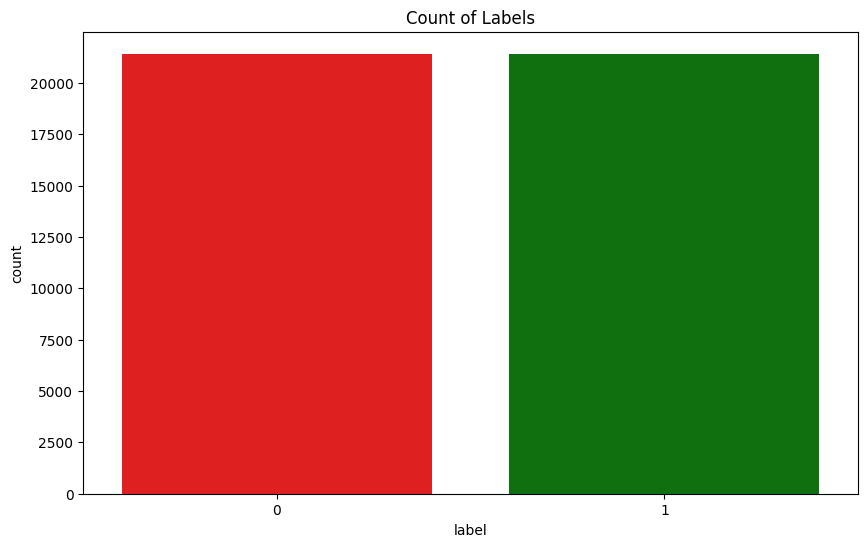

label
1    21417
0    21417
Name: count, dtype: int64

In [8]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent results
np.random.seed(2023)

# Plotting the count of labels
plt.figure(figsize=(10, 6))
palette = {"1": "green", "0": "red"}
sns.countplot(x='label', data=data, palette=palette)
plt.title('Count of Labels')
plt.show()

# Retrieve count data and format it
count_data = data['label'].value_counts().to_dict()
count_data_json = {'Fake': round(count_data[0]), 'Real': round(count_data[1])}
plot_data = data['label'].value_counts().to_dict()
json_file_path = 'count_plot_data_NB.json'

# Save to JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(count_data_json, json_file)


data['label'].value_counts()

In [10]:
data.head()
data = data.drop(['date'], axis =1)

In [11]:
data.head()

,title,text,subject,label
0,At least 12 dead in bus crash on excursion to ...,MEXICO CITY (Reuters) - Twelve people died and...,worldnews,1
1,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,left-news,0
2,Commandos storm plane in Philippines-U.S. hija...,MANILA (Reuters) - Philippine commandos and la...,worldnews,1
3,U.S. to decide soon on future of Taliban offic...,WASHINGTON (Reuters) - The United States will ...,worldnews,1
4,U.N. urges Bangladesh to move Rohingya refugee...,GENEVA (Reuters) - The U.N. refugee agency urg...,worldnews,1


In [12]:
data = data.drop(['subject'], axis =1 )

In [13]:
data.head()

,title,text,label
0,At least 12 dead in bus crash on excursion to ...,MEXICO CITY (Reuters) - Twelve people died and...,1
1,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,0
2,Commandos storm plane in Philippines-U.S. hija...,MANILA (Reuters) - Philippine commandos and la...,1
3,U.S. to decide soon on future of Taliban offic...,WASHINGTON (Reuters) - The United States will ...,1
4,U.N. urges Bangladesh to move Rohingya refugee...,GENEVA (Reuters) - The U.N. refugee agency urg...,1


In [14]:
data.dropna(inplace = True)

In [15]:
data['label'].value_counts()

label
1    21417
0    21417
Name: count, dtype: int64

**Clean the dataset and combine titles and text**

In [16]:
import string
def clean_text_data(text):
  # turn all the data into strings with lovercase just in case
  text = str(text)
  text = text.lower()
  # remove all tags(html and url), numbers and punctuations as they are not relevant for the processs
  to_remove = r'https?://\S+|www\.\S+|<.*?>|\d+|\W+'
  text = re.sub(to_remove, ' ', text)
  return text.strip()

# combine title and text and clean each text insatnce
data['title_and_text'] = data['title'] + ' ' + data['text']
data['title_and_text'] = data['text'].apply(clean_text_data)

### **Show how articles are distributed with length over each class. This will aid in choosing how long the user input should be.**

<ipython-input-19-41aa0015d352>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Fake News', 'Real News'], y=[mean_lengths_json['Fake'], mean_lengths_json['Real']], palette={'Fake News': 'red', 'Real News': 'green'})


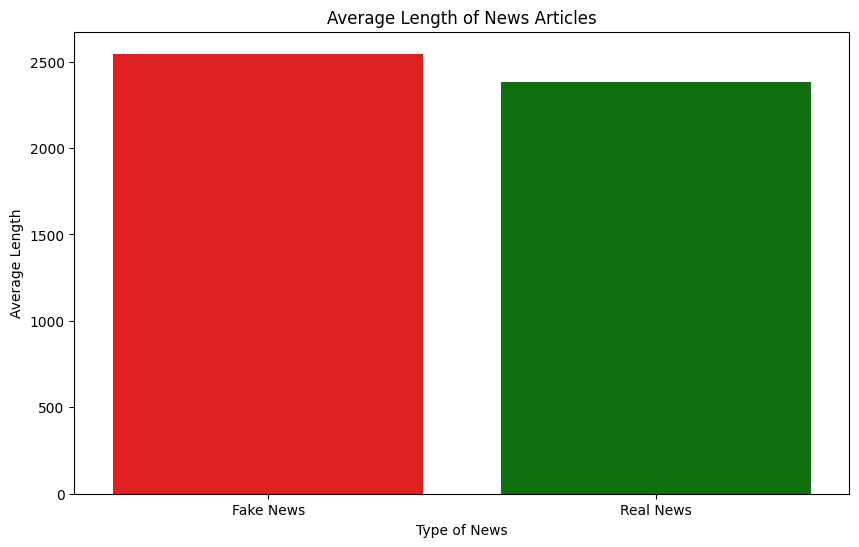

In [19]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data['length'] = data['text'].apply(len)

mean_lengths = data.groupby('label')['length'].mean().to_dict()

# Map labels to 'Fake' and 'Real'
mean_lengths_json = {'Fake': round(mean_lengths[0]), 'Real':round( mean_lengths[1])}

# Plotting the average lengths
plt.figure(figsize=(10, 6))
sns.barplot(x=['Fake News', 'Real News'], y=[mean_lengths_json['Fake'], mean_lengths_json['Real']], palette={'Fake News': 'red', 'Real News': 'green'})
plt.title('Average Length of News Articles')
plt.ylabel('Average Length')
plt.xlabel('Type of News')
plt.show()
# Save for web app
with open('mean_lengths_NB.json', 'w') as file:
    json.dump(mean_lengths_json, file)



Word cloud repersentation

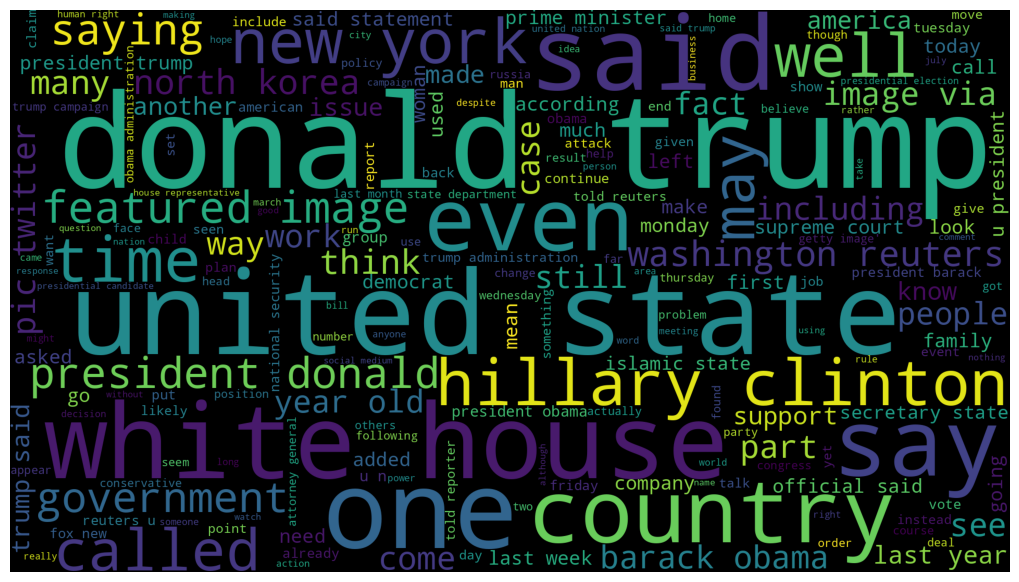

In [25]:
from wordcloud import WordCloud
wcText = ''.join(str(data['title_and_text'].tolist()))
wordcloud = WordCloud(width=1920, height = 1080).generate(wcText)
figure = plt.figure(figsize=(10,10))
plt.imshow(wordcloud) # viusalize wordlcoud
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42834 entries, 0 to 42833
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           42834 non-null  object
 1   text            42834 non-null  object
 2   label           42834 non-null  int64 
 3   title_and_text  42834 non-null  object
 4   length          42834 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


In [21]:
data.head()

,title,text,label,title_and_text,length
0,At least 12 dead in bus crash on excursion to ...,MEXICO CITY (Reuters) - Twelve people died and...,1,mexico city reuters twelve people died and w...,1469
1,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,0,he s been europe s version of the outspoken te...,1606
2,Commandos storm plane in Philippines-U.S. hija...,MANILA (Reuters) - Philippine commandos and la...,1,manila reuters philippine commandos and law en...,3014
3,U.S. to decide soon on future of Taliban offic...,WASHINGTON (Reuters) - The United States will ...,1,washington reuters the united states will soon...,538
4,U.N. urges Bangladesh to move Rohingya refugee...,GENEVA (Reuters) - The U.N. refugee agency urg...,1,geneva reuters the u n refugee agency urged ba...,2729


### **Preparing the data for model training by splitting the words and redcue to root word**

In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer as wn
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.model_selection import train_test_split as tts
from nltk.tokenize import word_tokenize


# Initialize NLTK components

# remove the stopwords
def remove_stopwords_lemmatize(text):
    lemmatizer = wn()
    tokenized = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return ' '.join([lemmatizer.lemmatize(w) for w in tokenized if w not in stop_words])

data['title_and_text'] = data['title_and_text'].apply(remove_stopwords_lemmatize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Vectorize textual data for training so machine can understand

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(data['title_and_text'], data['label'], test_size=0.20)

# Define the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer() # consider 1, 2 or max 3 words in a sequence

# Fit and transform the training data
X_tfidf_trian = tfidf_vectorizer.fit_transform(X_train)


# Transform the test data
X_tfidf_test = tfidf_vectorizer.transform(X_test)



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

X_count_trian = count_vectorizer.fit_transform(X_train)
X_count_test = count_vectorizer.transform(X_test)

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
model = MultinomialNB()
model.fit(X_tfidf_trian, y_train)
y_pred = model.predict(X_tfidf_test)
scores = cross_val_score(model, X_tfidf_test, y_test, cv=5, scoring='accuracy')
print("Accuracy TFIDF:", accuracy_score(y_test, y_pred))
print("Cross-Validation Accuracy TFIDF:", scores.mean())


model2 = MultinomialNB()
model2.fit(X_count_trian, y_train)
pred = model2.predict(X_count_test)
print("Accuracy COUNT:", accuracy_score(y_test, pred))
scores2 = cross_val_score(model2, X_count_test, y_test, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy COUNT:", scores2.mean())

Accuracy TFIDF: 0.9332321699544764
Cross-Validation Accuracy TFIDF: 0.9125709023113115
Accuracy COUNT: 0.9487568577098168
Cross-Validation Accuracy COUNT: 0.9284458676562848


The increace in accuracy between count vectorizer and tfidf is 2%, so and it was more precisee on manual article tests so far, so I will cointune to use count vectorizer for the experiment

In [30]:
count_vectorizer_ngram = CountVectorizer(ngram_range=(2,2),min_df=0.002, max_df=0.8) # ignore words that appear in fewer than 2% and in more than 80, to help make ngram use easier
# removing rare words will remove typos
X_count_trian_ngram = count_vectorizer_ngram.fit_transform(X_train)
X_count_test_ngram = count_vectorizer_ngram.transform(X_test)

model2_ngram = MultinomialNB()
model2_ngram.fit(X_count_trian_ngram, y_train)
pred = model2_ngram.predict(X_count_test_ngram)
print("Accuracy COUNT:", accuracy_score(y_test, pred))
scores3 = cross_val_score(model2_ngram, X_count_test_ngram, y_test, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy COUNT:", scores3.mean())

Accuracy COUNT: 0.9660324500992179
Cross-Validation Accuracy COUNT: 0.939068867967584


In [31]:
import pickle
with open('/content/drive/MyDrive/Thesis/Naive_bayes/no_ngram/last_naive_model_final.pkl', 'wb') as f:
    pickle.dump(model, f)

# Ofload the model and vector to pickle files
with open('/content/drive/MyDrive/Thesis/Naive_bayes/no_ngram/last_count_vectorizer_NB_final.pkl', 'wb') as f:
    pickle.dump(count_vectorizer, f)

"""with open('/content/drive/MyDrive/Thesis/Naive_bayes/no_ngram/tfidf_NB.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)"""

"with open('/content/drive/MyDrive/Thesis/Naive_bayes/no_ngram/tfidf_NB.pkl', 'wb') as f:\n    pickle.dump(tfidf_vectorizer, f)"

In [ ]:
import pickle

def classify_news_article_nb(article_text, model, vect):
    article_text = clean_text_data(article_text)
    string = remove_stopwords_lemmatize(article_text)
    df = pd.DataFrame({'text': [string]})
    string_vect = vect.transform(df['text'])
    # Get predictions from the Multinomial Naive Bayes classifier
    prediction = model.predict(string_vect)
    print(prediction[0])
    if prediction[0] == 0:
        return "Fake News"
    else:
        return "Real News"


sample_article = "Israeli Prime Minister Benjamin Netanyahu has angrily condemned the International Criminal Court\'s prosecutor for seeking arrest warrants for him alongside Hamas\'s leaders over alleged war crimes in the Gaza conflict.\
Mr Netanyahu said he rejected with disgust that \"democratic Israel\" had been compared with what he called \"mass murderers\".\
Mr Netanyahu\'s comments have been echoed by US President Joe Biden, who said there was no equivalence between Israel and Hamas. \
The chief ICC prosecutor, Karim Khan, said there were reasonable grounds to believe that Mr Netanyahu and his Defence Minister Yoav Gallant bore criminal responsibility for alleged war crimes and crimes against humanity in Gaza.\
The ICC is also seeking a warrant for Hamas\'s leader in Gaza, Yahya Sinwar, for war crimes.\
Israel and the US, its key ally, are not members of the ICC, which was set up in 2002."

predicted_label = classify_news_article_nb(sample_article, model, tfidf_vectorizer)
print("Predicted Label Ngram:", predicted_label)


predicted_label = classify_news_article_nb(sample_article, model2_ngram, count_vectorizer_ngram)
print("Predicted Label Ngram:", predicted_label)

predicted_label = classify_news_article_nb(sample_article, model2, count_vectorizer)
print("Predicted Label Plain:", predicted_label)

1
Predicted Label Ngram: Real News
1
Predicted Label Ngram: Real News
1
Predicted Label Plain: Real News


Confusion Matrix:
 [[4076  194]
 [  97 4200]]


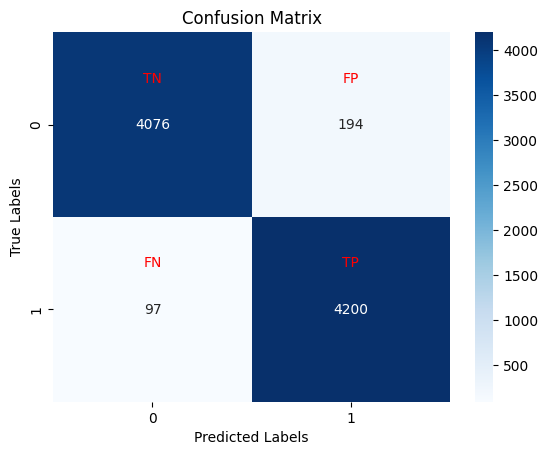

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Annotate each cell with the respective quadrant labels
labels = ['TN', 'FP', 'FN', 'TP']
label_positions = [(0,0), (0,1), (1,0), (1,1)]
for label, pos in zip(labels, label_positions):
    plt.text(pos[1]+0.5, pos[0]+0.25, label, ha='center', va='center', color='red')

plt.show()